# Courses per Department per Year

The output is a graph where the Y-axis is the number of courses, the X-axis is the number of years, and the lines show departments' place on those axes. \
Low-course departments are not shown on the graph. \

In [23]:
%pip install -qqq matplotlib

import matplotlib.pyplot as plt
from utils.get_all_dfs import *

years = get_all_dfs("courses", by_year=True)
year_labels = list(years.keys())

Note: you may need to restart the kernel to use updated packages.


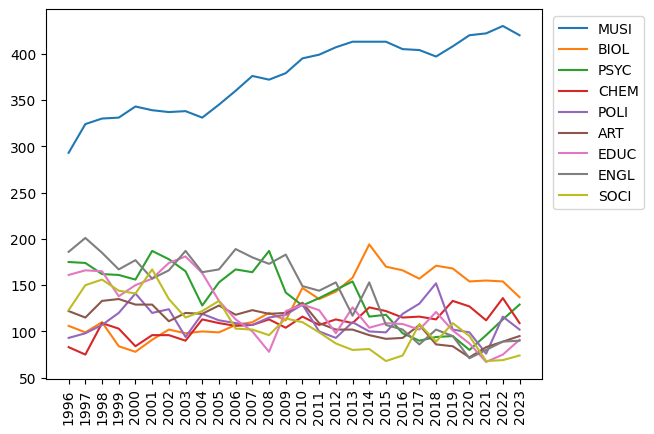

In [24]:
# Format of {dept: {year: count, year: count, ...}, dept: {year: count, year: count, ...}, ...}
# Where count is the number of courses in that department in that year
depts_yearly_count = {}
#Keep track of all possible years to add values to departments with no course in a year (e.g. before being founded)
# This will also function as our x-axis (years). We don't use the year_labels because we may want to ignore some years (e.g. a year w/ only one semester)
possible_years = []

for year, courses in years.items():
    # Skip 2024 because it's incomplete
    if year == "2024": continue 
        
    # Add year to possible years
    possible_years.append(year)
        
    for index, course in courses.iterrows():
        dept = course['dept']
        # Add department if needed
        if dept not in depts_yearly_count:
            depts_yearly_count[dept] = {}
        
        # Add year to department if needed
        if year not in depts_yearly_count[dept]:
            depts_yearly_count[dept][year] = 0
        
        depts_yearly_count[dept][year] += 1
        
plt.xticks(rotation=90)
# Add missing values for departments that had no courses in a year
# And plot the number of courses per department per year

# sort depts_yearly_counts by average number of courses per year
sorted_depts_yearly_count = dict(sorted(depts_yearly_count.items(), key=lambda x: list(x[1].values())[-1], reverse=True))

for dept in list(sorted_depts_yearly_count.keys()):
    # Skip departments with less than an avg. of 100 courses / year 
    # (too few to be significant)
    if sum(depts_yearly_count[dept].values())/len(depts_yearly_count[dept].values()) < 100: continue
    
    # For every year
    for year in possible_years:
        # If the department had no courses in that year, manually set the course count for the year to 0
        if year not in depts_yearly_count[dept]:
            depts_yearly_count[dept][year] = 0
    
    course_counts = depts_yearly_count[dept].values()
    plt.plot(possible_years, course_counts, label=dept)

plt.legend(bbox_to_anchor=(1.22, 1.0), loc="upper right")

